# Data analysis on the basic types of Wheelers in India

In [1]:
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
# Fetching DataSets

In [3]:
df1=pd.read_csv('./Downloads/1_ev_charger_dataset.csv')
df1.head()

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [4]:
# Exploratory Data Analysis

In [5]:
print('DF1 Shape: ',df1.shape)

DF1 Shape:  (24, 6)


In [6]:
# checking the info(columns, datatypes, nulls) of the dataset
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    24 non-null     object
 1   2W        24 non-null     int64 
 2   3W        24 non-null     int64 
 3   4W        24 non-null     int64 
 4   Bus       24 non-null     int64 
 5   Chargers  24 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB
None


In [7]:
# getting a statistical summary of the dataset
d1=df1.describe()
d1

,2W,3W,4W,Bus,Chargers
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,8421.458333,3853.166667,334.041667,28.500000,106.791667
std,10942.261145,8850.690961,476.930628,63.771331,96.623869
min,187.000000,234.000000,12.000000,0.000000,10.000000
25%,848.000000,512.750000,34.750000,0.000000,25.000000
50%,2967.500000,931.000000,129.000000,0.000000,67.500000
75%,10697.750000,2659.250000,434.000000,5.500000,180.250000
max,38558.000000,42881.000000,1895.000000,197.000000,317.000000


# Analysis of 2-wheelers EVs

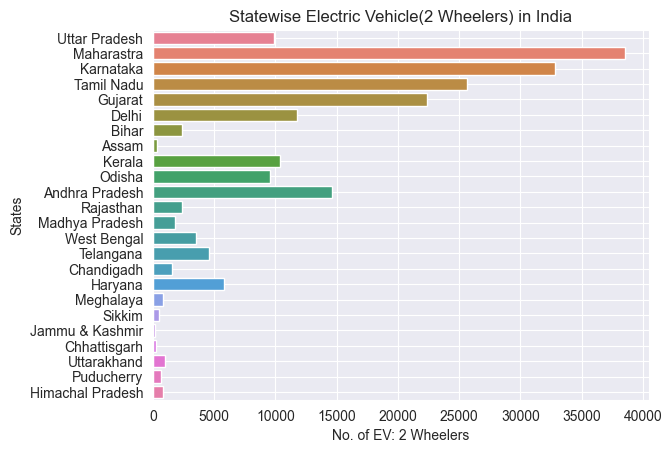

In [8]:
with sns.axes_style("darkgrid"):
    sns.color_palette("hls", 8)
    sns.barplot(data=df1,y=df1['Region'].sort_values(ascending=True),x='2W',hue="Region")
    plt.ylabel('States')
    plt.xlabel('No. of EV: 2 Wheelers')
    plt.title(label='Statewise Electric Vehicle(2 Wheelers) in India',weight=200)
    plt.grid(True)
    plt.savefig("EV.jpg")
    plt.show()

# Analysis of 3-wheelers EV


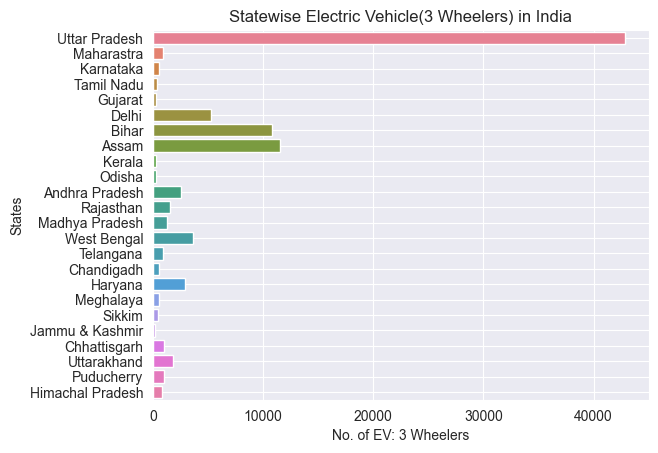

In [9]:
with sns.axes_style("darkgrid"):
    
    sns.color_palette("hls", 8)
    sns.barplot(data=df1,y=df1['Region'].sort_values(ascending=True),x='3W',hue="Region")
    plt.ylabel('States')
    plt.xlabel('No. of EV: 3 Wheelers')
    plt.title(label='Statewise Electric Vehicle(3 Wheelers) in India',weight=200)
    plt.grid(True)
    plt.show()

    

# Analysis of 4 wheelers

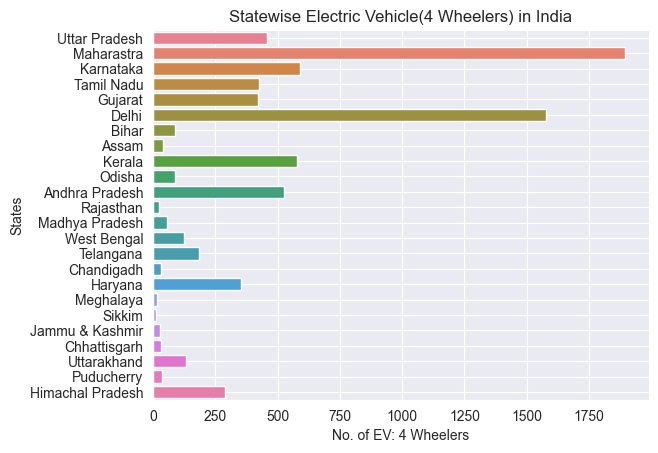

In [10]:
with sns.axes_style('darkgrid'):
    sns.color_palette("hls", 8)
    sns.barplot(data=df1,y=df1['Region'].sort_values(ascending=True),x='4W',hue="Region")
    plt.ylabel('States')
    plt.xlabel('No. of EV: 4 Wheelers')
    plt.title(label='Statewise Electric Vehicle(4 Wheelers) in India',weight=200)
    plt.grid(True)
    plt.show()

# Analysis of EV Buses

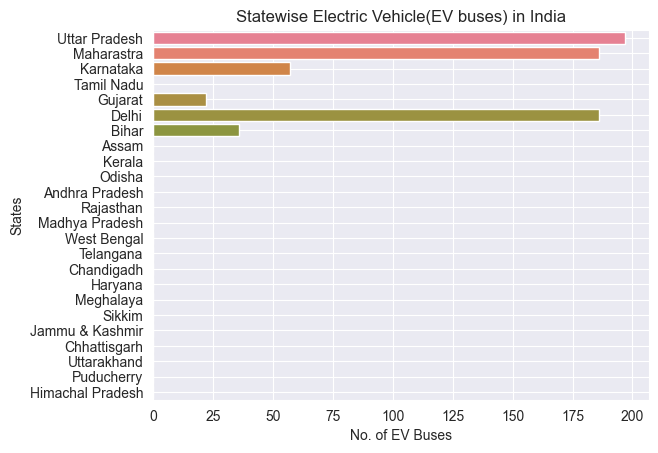

In [11]:
with sns.axes_style('darkgrid'):
    sns.color_palette("hls", 8)
    sns.barplot(data=df1,y=df1['Region'].sort_values(ascending=True),x='Bus',hue="Region")
    plt.ylabel('States')
    plt.xlabel('No. of EV Buses')
    plt.title(label='Statewise Electric Vehicle(EV buses) in India',weight=200)
    plt.grid(True)
    plt.show()

# Data Normalization

In [12]:
DataSet=df1.iloc[:,0:5]

In [13]:
DataSet.head()

,Region,2W,3W,4W,Bus
0,Uttar Pradesh,9852,42881,458,197
1,Maharastra,38558,893,1895,186
2,Karnataka,32844,568,589,57
3,Tamil Nadu,25642,396,426,0
4,Gujarat,22359,254,423,22


In [14]:
DataSet_copy=DataSet.copy()

In [15]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
sc=StandardScaler()
le=LabelEncoder()


In [16]:
state=le.fit_transform(DataSet_copy.iloc[:,0])

In [17]:
DataSet_copy=DataSet_copy.drop(columns=['Region'])

In [18]:
state=pd.DataFrame(state)
state=state.rename(columns={0:'Region'})
frames=[state,DataSet_copy]
state.head()

,Region
0,21
1,13
2,10
3,19
4,6


In [19]:
res=pd.concat(frames,axis=1)

In [20]:
res

,Region,2W,3W,4W,Bus
0,21,9852,42881,458,197
1,13,38558,893,1895,186
2,10,32844,568,589,57
3,19,25642,396,426,0
4,6,22359,254,423,22
5,5,11756,5287,1578,186
6,2,2388,10783,89,36
7,1,357,11547,42,0
8,11,10345,308,578,0
9,15,9540,253,89,0


In [21]:
final_dataset=res.values

In [22]:
final_dataset

array([[   21,  9852, 42881,   458,   197],
       [   13, 38558,   893,  1895,   186],
       [   10, 32844,   568,   589,    57],
       [   19, 25642,   396,   426,     0],
       [    6, 22359,   254,   423,    22],
       [    5, 11756,  5287,  1578,   186],
       [    2,  2388, 10783,    89,    36],
       [    1,   357, 11547,    42,     0],
       [   11, 10345,   308,   578,     0],
       [   15,  9540,   253,    89,     0],
       [    0, 14578,  2587,   524,     0],
       [   17,  2387,  1578,    24,     0],
       [   12,  1789,  1254,    57,     0],
       [   23,  3547,  3654,   124,     0],
       [   20,  4578,   898,   186,     0],
       [    3,  1567,   542,    32,     0],
       [    7,  5782,  2876,   354,     0],
       [   14,   856,   566,    18,     0],
       [   18,   525,   425,    12,     0],
       [    9,   187,   234,    27,     0],
       [    4,   259,   964,    34,     0],
       [   22,   954,  1865,   134,     0],
       [   16,   641,   995,    

In [23]:
sc.fit_transform(final_dataset)

array([[ 1.37239873,  0.13354731,  4.50442093,  0.26549859,  2.69908231],
       [ 0.21669454,  2.8133777 , -0.34164942,  3.34331887,  2.52288109],
       [-0.21669454,  2.27995086, -0.37915949,  0.54607928,  0.45652134],
       [ 1.08347268,  1.60761273, -0.39901098,  0.19695979, -0.45652134],
       [-0.79454663,  1.30113035, -0.41539999,  0.19053428, -0.1041189 ],
       [-0.93900965,  0.31129402,  0.16548674,  2.66435643,  2.52288109],
       [-1.37239873, -0.56324967,  0.79981089, -0.5248394 ,  0.12013719],
       [-1.51686175, -0.75285238,  0.88798842, -0.62550575, -0.45652134],
       [-0.07223151,  0.17957101, -0.40916755,  0.52251907, -0.45652134],
       [ 0.50562058,  0.10442075, -0.41551541, -0.5248394 , -0.45652134],
       [-1.66132477,  0.57474004, -0.14613539,  0.40685985, -0.45652134],
       [ 0.79454663, -0.56334302, -0.26258973, -0.66405882, -0.45652134],
       [ 0.07223151, -0.61916893, -0.29998439, -0.59337819, -0.45652134],
       [ 1.66132477, -0.45505196, -0.0

In [24]:
fd=pd.DataFrame(final_dataset)
fd=fd.rename(columns={0:'States',1:'2w',2:'3w',3:'4w',4:'Ev_Buses'})

# Principle Component Analysis

In [25]:
from sklearn.decomposition import PCA
pca = PCA()

transformed = pca.fit_transform(fd)
transformed_df = pd.DataFrame(transformed, columns=[f"PC{i+1}" for i in range(len(fd.columns))])
transformed_df

,PC1,PC2,PC3,PC4,PC5
0,-2873.432324,38948.628935,-98.374960,8.085342,4.479524
1,30313.401917,384.280122,620.485165,10.537483,3.141283
2,24631.829273,-577.972198,-507.033189,22.464748,-5.217257
3,17490.910277,-1542.262664,-444.399196,-17.731606,7.745244
4,14245.099446,-2044.246879,-339.411038,2.449002,-6.715981
5,3193.766647,1802.356954,1139.467506,17.024632,-3.869218
6,-6764.700643,6222.295060,-84.436652,4.588362,-10.963140
7,-8868.055169,6757.805099,-73.992529,-29.738461,-8.882654
8,2308.901443,-3310.232575,195.507584,-40.501049,4.275876
9,1500.048348,-3457.311886,-264.376994,12.518100,1.727993


In [26]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

In [27]:
summary = pd.DataFrame(index=transformed_df.columns)
summary['standard_deviation'] = np.sqrt(pca.explained_variance_)
summary['explained_variance_ratio'] = explained_variance
summary['cum_explained_variance_ratio'] = cumulative_explained_variance

In [28]:
summary

,standard_deviation,explained_variance_ratio,cum_explained_variance_ratio
PC1,10971.324475,6.070113e-01,0.607011
PC2,8821.651248,3.924446e-01,0.999456
PC3,327.859069,5.420671e-04,0.999998
PC4,18.998456,1.820184e-06,1.000000
PC5,6.713171,2.272658e-07,1.000000


In [29]:
pd.DataFrame(pca.components_, index=transformed_df.columns, columns=fd.columns).T.style.background_gradient(cmap = 'Purples')

,PC1,PC2,PC3,PC4,PC5
States,-0.000008,0.000100,-0.003809,0.090417,0.995897
2w,0.993425,0.109938,-0.031929,0.000391,-0.000160
3w,-0.110148,0.993896,-0.004974,-0.003761,0.000221
4w,0.031092,0.008007,0.993550,-0.107904,0.013596
Ev_Buses,0.002579,0.004596,0.108629,0.990034,-0.089469


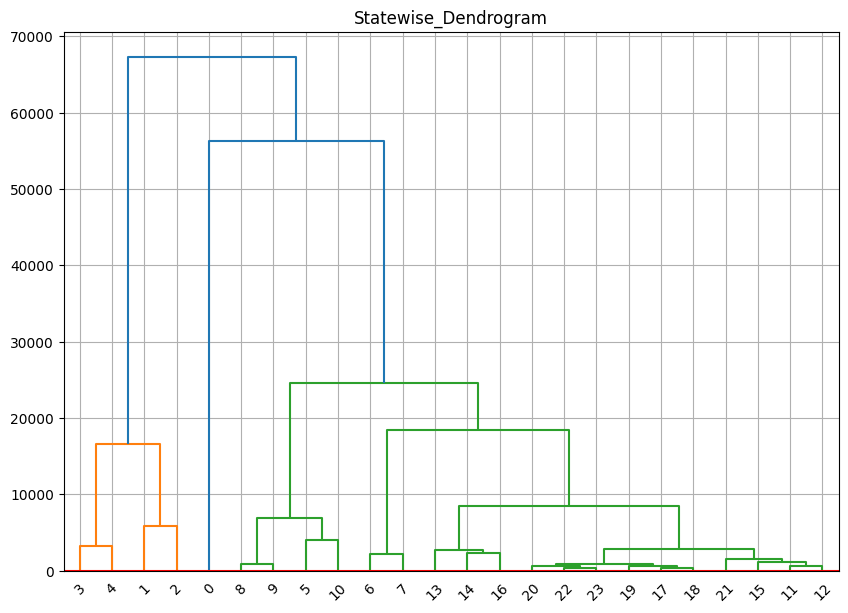

In [30]:
import scipy.cluster.hierarchy as shc
plt.style.use="seaborn-v0_8-bright"
plt.figure(figsize=(10,7))
plt.title("Statewise_Dendrogram")
dendogram = shc.dendrogram(shc.linkage(final_dataset, method='ward'))
plt.hlines(y=7, xmin=0,xmax=400, color='red')
plt.grid(True)

In [31]:
fd_copy=fd.drop(columns=['States'])

In [32]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6)

labels_1 = cluster.fit_predict(fd_copy)

In [34]:
df_2_cluster = pd.DataFrame(fd_copy,columns=fd_copy.columns)
df_2_cluster['Cluster'] = cluster.labels_

df_2_cluster_pca = transformed_df.copy()
df_2_cluster_pca['Cluster'] = cluster.labels_

df_2_profile = df_2_cluster.copy()
cluster_columns = df_2_profile.columns
data_pivot_2 = df_2_profile[cluster_columns].groupby("Cluster").mean().T

data_pivot_2_mean = data_pivot_2.mean(axis=1).reset_index()
data_pivot_2_mean.columns = ['Variable', 'Values']

In [35]:
data_pivot_2_mean

,Variable,Values
0,2w,14053.150641
1,3w,9749.387821
2,4w,497.375000
3,Ev_Buses,65.666667


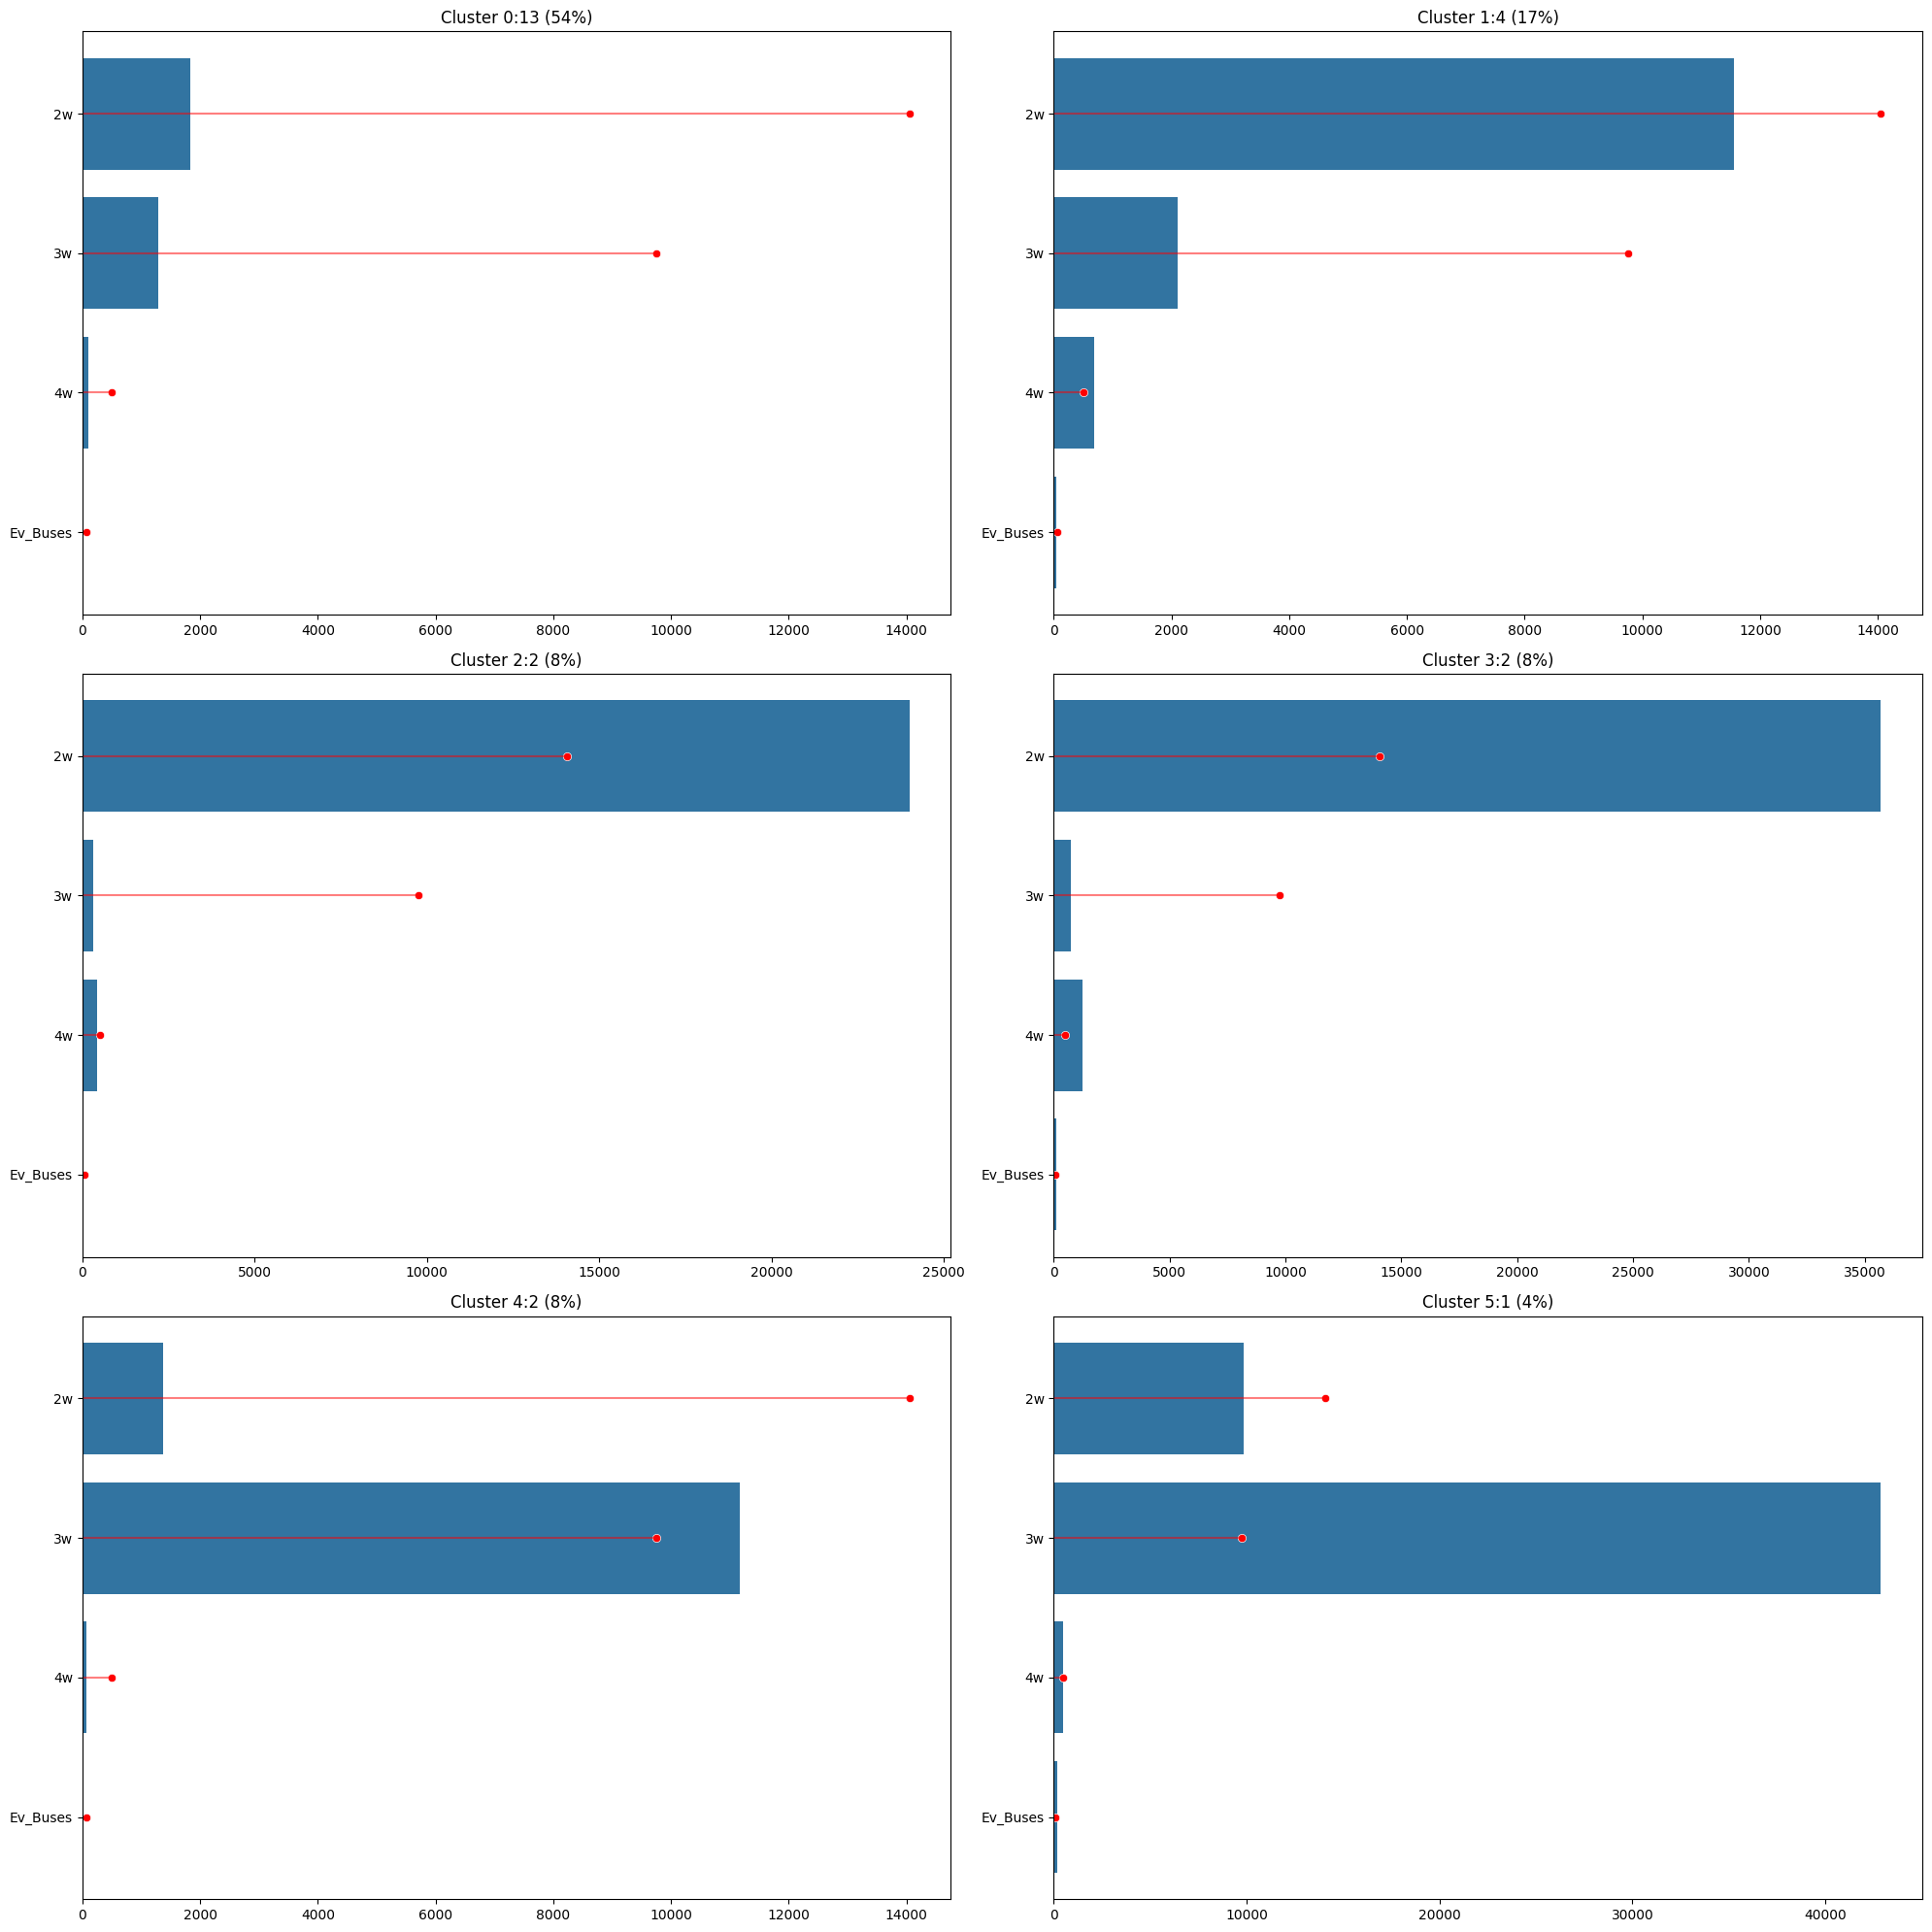

In [36]:
plt.figure(figsize=(20,20))
for i in range(6):
    plt.subplot(3,2,i+1)
    sns.barplot(data_pivot_2, x=i, y=data_pivot_2.index)
    sns.scatterplot(data_pivot_2_mean, x='Values', y='Variable', color='red')
    for index, row in data_pivot_2_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Values'], color='red', alpha=0.5)
    if i < 6:
        i+=1

    plt.xlabel("")
    plt.ylabel("")
    plt.title(f"Cluster {i-1}:{df_2_profile['Cluster'].value_counts()[i-1]} ({df_2_profile['Cluster'].value_counts()[i-1]*100/len(df_2_profile):.0f}%)")

plt.tight_layout()
plt.show()

# Correlation matrix among the features

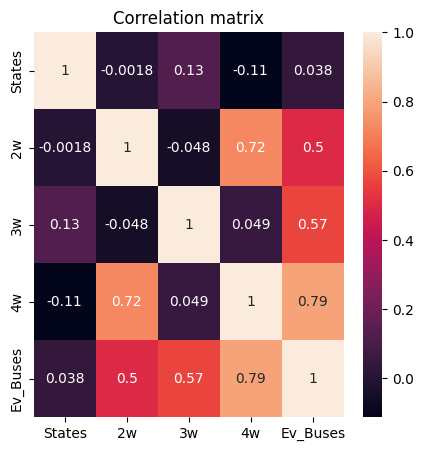

In [37]:
plt.figure(figsize=(5,5))
corrmatric=fd.corr()
sns.heatmap(corrmatric,annot=True,xticklabels='auto', yticklabels='auto')
plt.title("Correlation matrix")
plt.savefig("CorrMatrix")
plt.show()

# FuelCharges in Different States

In [38]:
FuelCost=pd.read_csv("./Downloads/states_data_car.csv")

In [39]:
FuelCost.head()

,state,capital,subsidy,road tax,petrol,diesel
0,Andhra Pradesh,Amaravati,0.0,1.0,111.65,99.41
1,Arunachal Pradesh,Itanagar,5000.0,0.0,95.89,84.81
2,Assam,Dispur,10000.0,1.0,96.34,84.24
3,Bihar,Patna,10000.0,1.0,109.17,95.82
4,Chhattisgarh,Raipur,5000.0,0.0,102.98,95.96


In [40]:
FuelCost.columns

Index(['state', 'capital', 'subsidy', 'road tax', 'petrol', 'diesel'], dtype='object')

In [65]:
# Exploratory data analysis
FuelCost.describe()

,subsidy,road tax,petrol,diesel
count,36.000000,36.000000,36.000000,36.000000
mean,3250.000000,0.492778,100.876667,90.516389
std,3682.972402,0.486994,6.266918,5.378121
min,0.000000,0.000000,84.100000,79.740000
25%,0.000000,0.000000,96.245000,86.500000
50%,2000.000000,0.500000,99.335000,90.225000
75%,5000.000000,1.000000,106.535000,95.265000
max,10000.000000,1.000000,111.970000,99.970000


In [42]:
FuelCost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     36 non-null     object 
 1   capital   36 non-null     object 
 2   subsidy   36 non-null     float64
 3   road tax  36 non-null     float64
 4   petrol    36 non-null     float64
 5   diesel    36 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.8+ KB


# Data Preprocessing 

In [43]:
Data2=FuelCost.iloc[:,[0,4,5]]

In [44]:
Data2.head()

,state,petrol,diesel
0,Andhra Pradesh,111.65,99.41
1,Arunachal Pradesh,95.89,84.81
2,Assam,96.34,84.24
3,Bihar,109.17,95.82
4,Chhattisgarh,102.98,95.96


In [45]:
Data_array=Data2.values

In [46]:
Data_array

array([['Andhra Pradesh', 111.65, 99.41],
       ['Arunachal Pradesh', 95.89, 84.81],
       ['Assam', 96.34, 84.24],
       ['Bihar', 109.17, 95.82],
       ['Chhattisgarh', 102.98, 95.96],
       ['Goa', 97.82, 90.37],
       ['Gujarat', 96.49, 92.23],
       ['Haryana', 97.24, 90.08],
       ['Himachal Pradesh', 95.74, 81.99],
       ['Jharkhand', 100.09, 94.88],
       ['Karnataka', 102.64, 88.55],
       ['Kerala', 106.45, 95.34],
       ['Madhya Pradesh', 110.02, 95.18],
       ['Maharashtra', 111.18, 95.66],
       ['Manipur', 101.22, 87.16],
       ['Meghalaya', 95.06, 83.28],
       ['Mizoram', 95.72, 82.17],
       ['Nagaland', 98.28, 86.65],
       ['Odisha', 104.45, 95.97],
       ['Punjab', 96.26, 86.63],
       ['Rajasthan', 108.07, 93.35],
       ['Sikkim', 102.85, 98.9],
       ['Tamil Nadu', 103.62, 95.24],
       ['Telangana', 111.97, 99.97],
       ['Tripura', 98.58, 87.52],
       ['Uttar Pradesh', 96.38, 89.55],
       ['Uttarakhand', 95.62, 90.55],
       ['West B

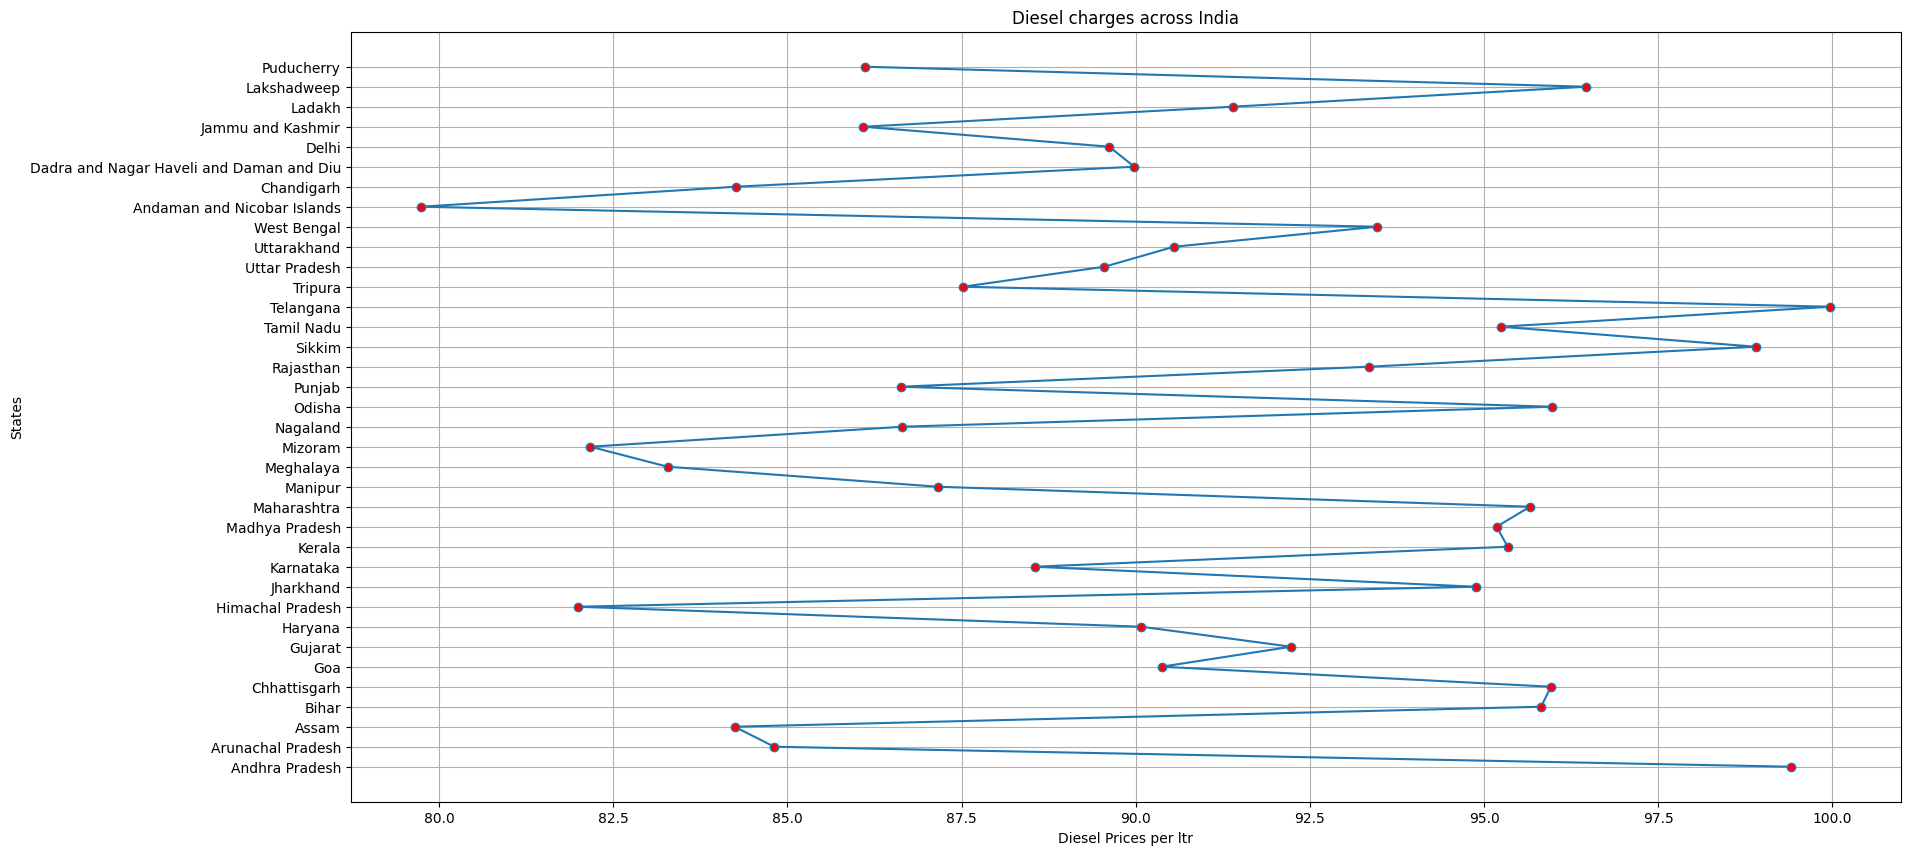

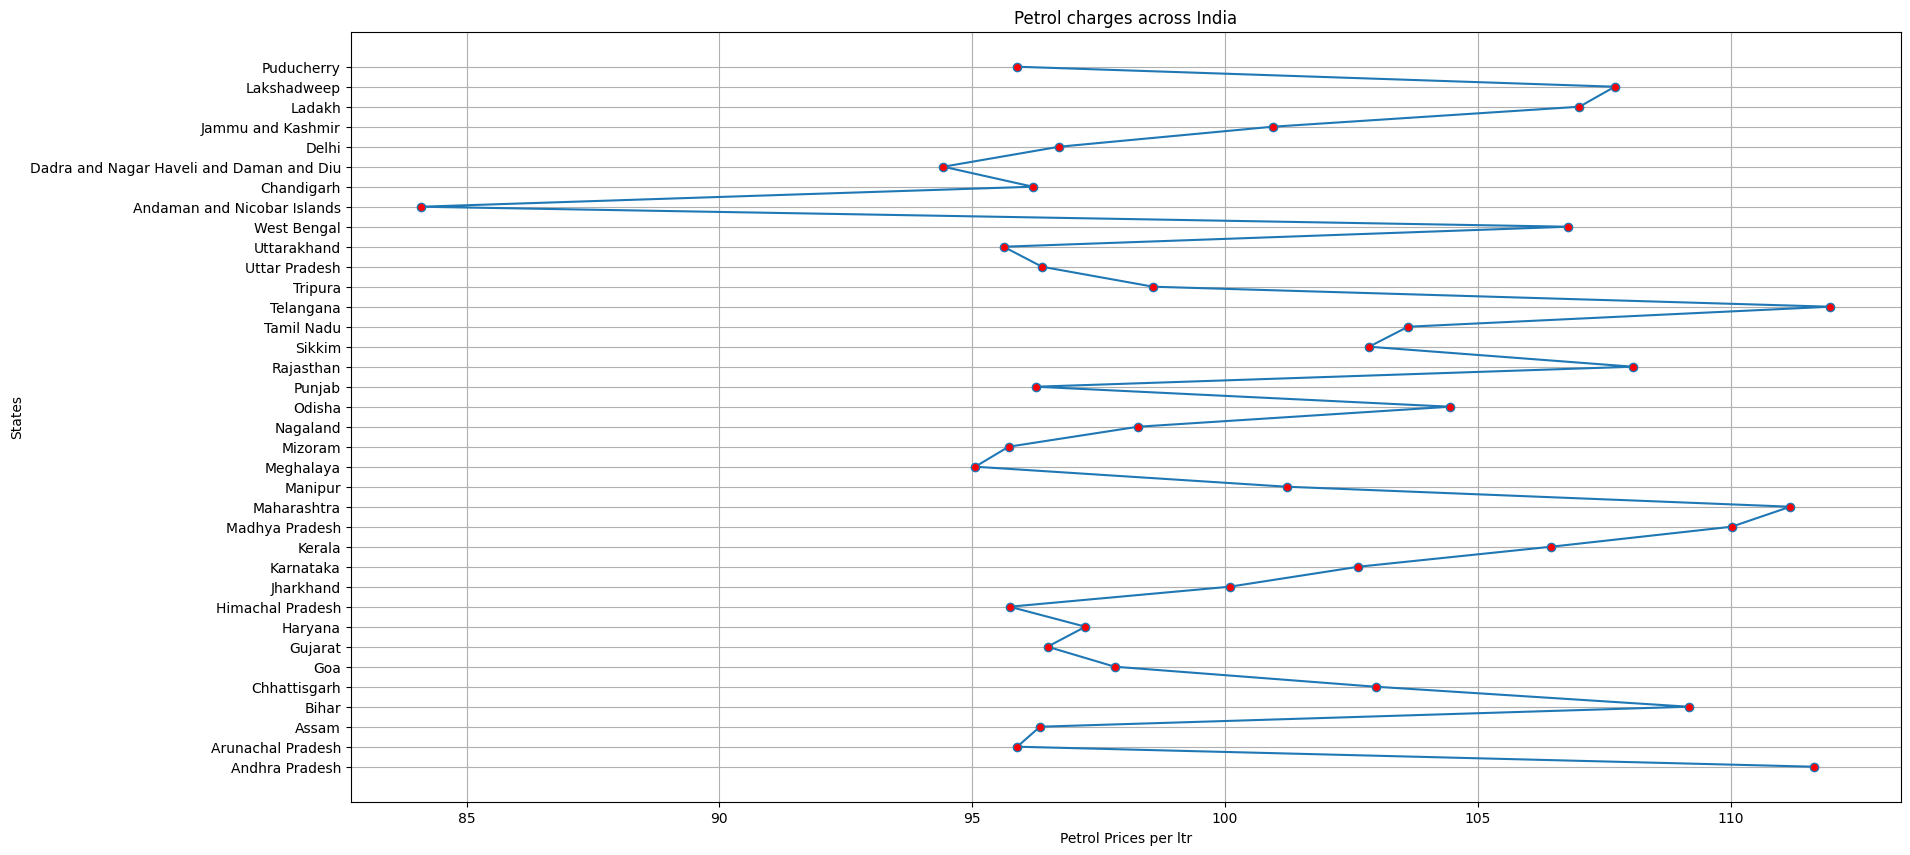

In [66]:
# Petrol prices visualization
plt.figure(figsize=(20,10))
plt.plot(Data_array[:,2],Data_array[:,0],marker="o",markerfacecolor="red")
plt.ylabel('States')
plt.xlabel('Diesel Prices per ltr')
plt.title("Diesel charges across India")
plt.savefig("out1.jpg",orientation ='landscape')
plt.grid(True)
plt.show()


#Dieasel prices visualization
plt.figure(figsize=(20,10))
plt.plot(Data_array[:,1],Data_array[:,0],marker="o",markerfacecolor='red')
plt.ylabel('States')
plt.xlabel('Petrol Prices per ltr')
plt.title("Petrol charges across India")
plt.savefig("out2.jpg",orientation ='portrait')
plt.grid(True)
plt.show()

# Data Normalization

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [49]:
arr=le.fit_transform(Data_array[:,0])

In [50]:
arr=pd.DataFrame(arr)

In [51]:
df=Data2.drop(['state'],axis=1)


In [52]:
df.head()

,petrol,diesel
0,111.65,99.41
1,95.89,84.81
2,96.34,84.24
3,109.17,95.82
4,102.98,95.96


In [53]:
frame=[arr,df]
Data1=pd.concat(frame,axis=1)

In [54]:
Data1=Data1.rename(columns={0:'state'})

In [55]:
data1=Data1.values

In [56]:
data1

array([[  1.  , 111.65,  99.41],
       [  2.  ,  95.89,  84.81],
       [  3.  ,  96.34,  84.24],
       [  4.  , 109.17,  95.82],
       [  6.  , 102.98,  95.96],
       [  9.  ,  97.82,  90.37],
       [ 10.  ,  96.49,  92.23],
       [ 11.  ,  97.24,  90.08],
       [ 12.  ,  95.74,  81.99],
       [ 14.  , 100.09,  94.88],
       [ 15.  , 102.64,  88.55],
       [ 16.  , 106.45,  95.34],
       [ 19.  , 110.02,  95.18],
       [ 20.  , 111.18,  95.66],
       [ 21.  , 101.22,  87.16],
       [ 22.  ,  95.06,  83.28],
       [ 23.  ,  95.72,  82.17],
       [ 24.  ,  98.28,  86.65],
       [ 25.  , 104.45,  95.97],
       [ 27.  ,  96.26,  86.63],
       [ 28.  , 108.07,  93.35],
       [ 29.  , 102.85,  98.9 ],
       [ 30.  , 103.62,  95.24],
       [ 31.  , 111.97,  99.97],
       [ 32.  ,  98.58,  87.52],
       [ 33.  ,  96.38,  89.55],
       [ 34.  ,  95.62,  90.55],
       [ 35.  , 106.79,  93.47],
       [  0.  ,  84.1 ,  79.74],
       [  5.  ,  96.2 ,  84.26],
       [  

In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [58]:
array2=sc.fit_transform(data1)

In [59]:
array2=pd.DataFrame(array2)

In [60]:
array2=array2.rename(columns={0:'State',1:'Petrol',2:'Diesel'})

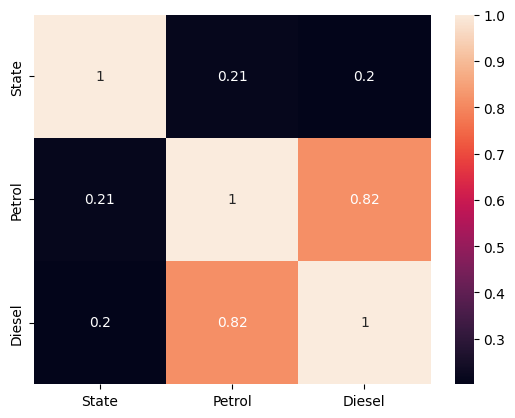

In [61]:
corrMatrix2=array2.corr()
sns.heatmap(corrMatrix2,annot=True)
plt.show()

In [70]:
arr_new=array2.drop(columns=['State'])

In [72]:
from sklearn.decomposition import PCA
pca = PCA()

transformed = pca.fit_transform(arr_new)
transformed_df = pd.DataFrame(transformed, columns=[f"PC{i+1}" for i in range(len(arr_new.columns))])
transformed_df.head()

,PC1,PC2
0,2.418721,0.046912
1,-1.331545,0.190274
2,-1.356056,0.317775
3,1.656226,0.241823
4,0.966559,-0.485181


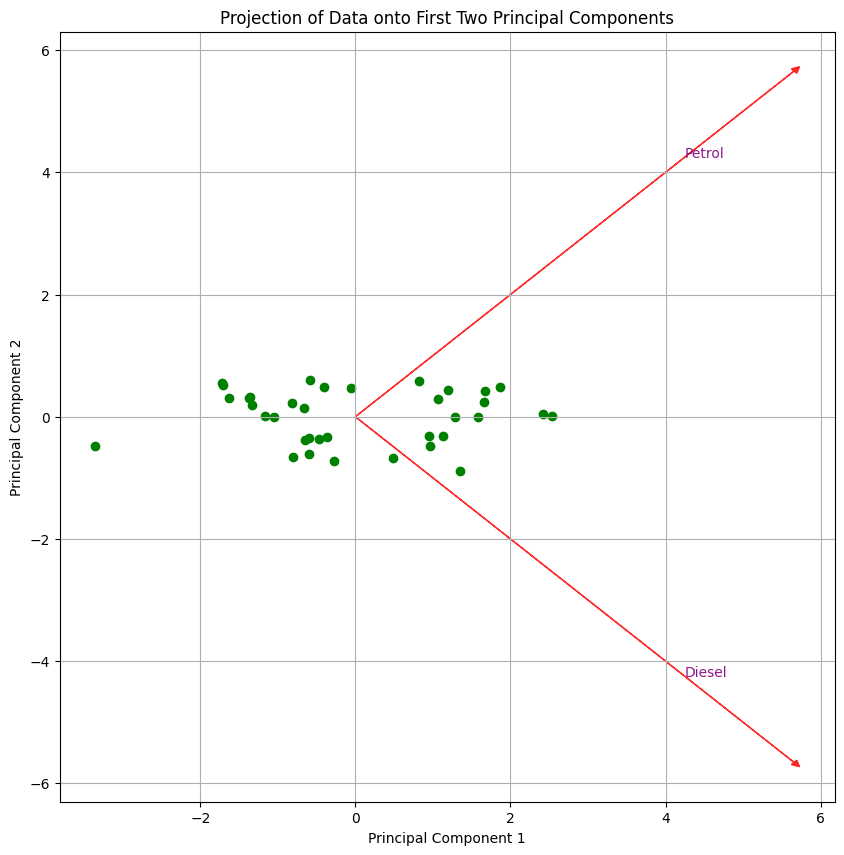

In [74]:
#scatter plot of the original data points wrt the first two Principal Components
plt.figure(figsize=(10,10))
plt.scatter(transformed[:,0], transformed[:,1], color='green')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Projection of Data onto First Two Principal Components")

#plotting the original attributes
for i, feature in enumerate(arr_new.columns):
    plt.arrow(0,0, pca.components_[0,i]*8, pca.components_[1,i]*8, color='red',  alpha=0.8, head_width=0.1, head_length=0.1)
    plt.text(pca.components_[0,i]*6, pca.components_[1,i]*6, feature, alpha=0.9, color='purple')

plt.savefig("PCA.jpg")
plt.grid(True)